## 0 - Import and Load

This Notebook has been prepared for running the linear regression over the second period. Very close to Linear regression V3, we chose to create a second one for two reasons :
- Some headers are different
- We wanted to be able to work on both periods simultaneously 

The structure of the file is the following.
- Import
- Filtering and Preprocessing ( 3 different versions)
- OLS Baseline
- OLS With Standardization
- OLS W. Normalization
- OLS Using RFE Features
- Visualisation

In [2470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2492]:
SP_path = '/Users/abdeslamguessous/Documents/GitHub/SemesterProject/'
PE_path = SP_path + 'ProcessEntropy-master/'
dependancies = PE_path + 'Pycharm_files_V3/'
#results_path = PE_path + 'Results_V3/'
users = pd.read_csv(PE_path + 'Users_with_features.csv')

results_with_users = pd.read_csv(dependancies + 'results_with_users_V3.csv')
results_with_users.drop('Unnamed: 0', axis=1, inplace=True)
results_with_users.set_index('Key',inplace=True)

In [2493]:
results_with_users.columns

Index(['source', 'target', 'flow', 'entropyStoT', 'entropyTtoS',
       'selfEntropyT', 'selfEntropyS', 'username_source',
       'author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source',
       'author_description_source', 'author_location_source',
       'author_private_source', 'author_verified_source',
       'author_account_creation_source', 'Year_creation_source',
       'FF_ratio2_source', 'FF_Ratio_source', 'TweetsNb_source',
       'Likes_avrg_source', 'Retweets_Avg_source', 'Replies_avg_source',
       'Quote_count_avg_source', 'username_target', 'author_followers_target',
       'author_tweets_target', 'author_following_target',
       'author_listed_target', 'author_description_target',
       'author_location_target', 'author_private_target',
       'author_verified_target', 'author_account_creation_target',
       'Year_creation_target', 'FF_ratio2_target', 'FF_Ratio_target',
       'TweetsNb_target', 'Likes_avrg_target',

In [2494]:
df = results_with_users

In [2495]:
len(df)

79242

In [2496]:
len(df.source.unique())

282

In [ ]:
df[]

In [2475]:
df.describe()

,source,target,flow,entropyStoT,entropyTtoS,selfEntropyT,selfEntropyS,author_followers_source,author_tweets_source,author_following_source,...,author_following_target,author_listed_target,Year_creation_target,FF_ratio2_target,FF_Ratio_target,TweetsNb_target,Likes_avrg_target,Retweets_Avg_target,Replies_avg_target,Quote_count_avg_target
count,7.924200e+04,7.924200e+04,7.924200e+04,79242.000000,79242.000000,79242.000000,79242.000000,7.924200e+04,7.924200e+04,79242.000000,...,79242.000000,79242.000000,79242.000000,79242.000000,79242.000000,79242.000000,79242.000000,79242.000000,79242.000000,79242.000000
mean,9.863367e+17,9.863367e+17,4.729117e-17,5.880144,5.880144,3.992815,3.992815,4.644520e+04,5.903583e+04,1109.553191,...,1109.553191,425.478723,2018.078014,0.698283,152.815627,13.280142,18.290175,2.421661,2.048783,0.405175
std,5.341698e+17,5.341698e+17,1.378805e+01,1.132762,1.132762,1.542558,1.542558,2.696617e+05,1.554572e+05,3037.162300,...,3037.162300,2025.238955,3.678735,0.284470,641.734236,25.990811,101.755856,10.815093,7.871847,2.734189
min,1.470876e+07,1.470876e+07,-2.137648e+02,0.486742,0.486742,0.054994,0.054994,3.000000e+00,1.000000e+02,0.000000,...,0.000000,0.000000,2008.000000,0.031438,-1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,8.848383e+17,8.848383e+17,-5.413158e-01,5.244459,5.244459,3.033033,3.033033,1.820000e+02,4.203000e+03,52.000000,...,52.000000,4.000000,2017.000000,0.471947,0.801347,4.000000,0.000000,0.000000,0.062500,0.000000
50%,1.234861e+18,1.234861e+18,0.000000e+00,5.823208,5.823208,4.587175,4.587175,9.505000e+02,1.422450e+04,239.000000,...,239.000000,13.000000,2020.000000,0.768919,2.888093,5.000000,0.333333,0.000000,0.333333,0.000000
75%,1.382878e+18,1.382878e+18,5.413158e-01,6.457264,6.457264,5.165593,5.165593,5.130000e+03,3.996400e+04,928.000000,...,928.000000,62.000000,2021.000000,0.975342,25.172414,10.000000,2.000000,0.461538,1.000000,0.083333
max,1.460486e+18,1.460486e+18,2.137648e+02,11.988261,11.988261,6.033737,6.033737,3.633841e+06,1.355233e+06,40235.000000,...,40235.000000,25706.000000,2021.000000,1.000000,8550.214118,257.000000,1103.500000,122.000000,82.250000,42.250000


For example, the author_following_target and Retweets_Avg_target fields have completely different orders of magnitude, with an average for the first one in the 10^3, and an average for the other around 10^0. If no rescaling technique is applied, feature X1 will inevitably have much more impact on the model than feature X2, whereas feature X2 could be much more relevant. 

In [2476]:
df[df['source'] ==1278448045974261763 ].selfEntropyS.unique()

array([4.3447807])

### Ajustment du sens du flow

In [2497]:
df['flow']=-df['flow']

In [2498]:
df.head(2)

,source,target,flow,entropyStoT,entropyTtoS,selfEntropyT,selfEntropyS,username_source,author_followers_source,author_tweets_source,...,author_verified_target,author_account_creation_target,Year_creation_target,FF_ratio2_target,FF_Ratio_target,TweetsNb_target,Likes_avrg_target,Retweets_Avg_target,Replies_avg_target,Quote_count_avg_target
Key,,,,,,,,,,,,,,,,,,,,,
1179330244345393152 - 1223056821037957120,1179330244345393152,1223056821037957120,0.587626,5.495502,4.712312,5.15535,2.849718,azcoinnews,1893,9316.0,...,False,2020-01-31 01:34:13+00:00,2020,0.837823,5.166102,3,5.0,1.333333,0.333333,0.333333
2184474645 - 1223056821037957120,2184474645,1223056821037957120,-0.415998,6.550041,4.425009,5.15535,5.178267,muneeb227,473,2072.0,...,False,2020-01-31 01:34:13+00:00,2020,0.837823,5.166102,3,5.0,1.333333,0.333333,0.333333


In [2499]:
df_back_up = df

In [2503]:
df = df[df['flow']>0]
len(df)

39621

In [2504]:
df.columns

Index(['source', 'target', 'flow', 'entropyStoT', 'entropyTtoS',
       'selfEntropyT', 'selfEntropyS', 'username_source',
       'author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source',
       'author_description_source', 'author_location_source',
       'author_private_source', 'author_verified_source',
       'author_account_creation_source', 'Year_creation_source',
       'FF_ratio2_source', 'FF_Ratio_source', 'TweetsNb_source',
       'Likes_avrg_source', 'Retweets_Avg_source', 'Replies_avg_source',
       'Quote_count_avg_source', 'username_target', 'author_followers_target',
       'author_tweets_target', 'author_following_target',
       'author_listed_target', 'author_description_target',
       'author_location_target', 'author_private_target',
       'author_verified_target', 'author_account_creation_target',
       'Year_creation_target', 'FF_ratio2_target', 'FF_Ratio_target',
       'TweetsNb_target', 'Likes_avrg_target',

In [2508]:
len(df[df['author_followers_source']<df['author_followers_target']])

21077

### 0-b - Tobbin Filtering

In [2480]:
df = df_back_up

In [2481]:
percentile_high = df.flow.quantile(0.95) # 10th percentile
percentile_high

5.026071162734409

In [2482]:
df = df[df['flow']<percentile_high]

In [2483]:
df = df[df['flow']>0]


In [2484]:
df_back_up = df

In [2485]:
len(df)

35658

### 0-c Aya's Filtering

In [2296]:
lst =[1385205739640131584,
 1234489772183343104,
 408382525,
 230190058,
 1143396858208800768,
 3240197969,
 188251389,
 904540565307617280,
 988869330,
 125922216,
 1382981076251971584,
 965548724247191552,
 1408890653887586306,
 1347927540988571649,
 1373262453161799686,
 781471603662196736,
 1455248470776877064,
 1355566985845694468,
 1057622011395084289,
 1262806249164255232,
 410377944,
 28803148,
 1436903038069903364,
 1410288349076721675,
 1413540569444356101,
 1405131947790290947,
 4727914933,
 1247885277374251009,
 1192824698024927233,
 38448943,
 1299632796844077057,
 1112983458433781761,
 2892043241,
 1174914666587250688,
 986040298462728193,
 38152701] 

In [2297]:
len(lst)

36

In [2298]:
len(df)

79242

In [2299]:
df_filter = df

In [2300]:
df_filter = df_filter[~df_filter['target'].isin(lst)]

In [2301]:
df_filter = df_filter[~df_filter['source'].isin(lst)]

In [2302]:
df_filter = df_filter[df_filter['flow']>0]

In [2303]:
df_filter.flow.max()

167.22443623566204

In [2304]:
df_filter.columns

Index(['source', 'target', 'flow', 'entropyStoT', 'entropyTtoS',
       'selfEntropyT', 'selfEntropyS', 'username_source',
       'author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source',
       'author_description_source', 'author_location_source',
       'author_private_source', 'author_verified_source',
       'author_account_creation_source', 'Year_creation_source',
       'FF_ratio2_source', 'FF_Ratio_source', 'TweetsNb_source',
       'Likes_avrg_source', 'Retweets_Avg_source', 'Replies_avg_source',
       'Quote_count_avg_source', 'username_target', 'author_followers_target',
       'author_tweets_target', 'author_following_target',
       'author_listed_target', 'author_description_target',
       'author_location_target', 'author_private_target',
       'author_verified_target', 'author_account_creation_target',
       'Year_creation_target', 'FF_ratio2_target', 'FF_Ratio_target',
       'TweetsNb_target', 'Likes_avrg_target',

In [2305]:
len(df_filter)

33930

In [2306]:
df_back_up = df_filter

### 1 - OLS Baseline

In [2408]:
#mod = smf.ols(formula='time ~ C(high_blood_pressure) * C(DEATH_EVENT,  Treatment(reference=0)) + C(diabetes)',
 #             data=df)

In [2409]:
df = df_back_up

In [2410]:
df.flow.min()

5.436194229502256e-05

In [2411]:
df.columns

Index(['source', 'target', 'flow', 'entropyStoT', 'entropyTtoS',
       'selfEntropyT', 'selfEntropyS', 'username_source',
       'author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source',
       'author_description_source', 'author_location_source',
       'author_private_source', 'author_verified_source',
       'author_account_creation_source', 'Year_creation_source',
       'FF_ratio2_source', 'FF_Ratio_source', 'TweetsNb_source',
       'Likes_avrg_source', 'Retweets_Avg_source', 'Replies_avg_source',
       'Quote_count_avg_source', 'username_target', 'author_followers_target',
       'author_tweets_target', 'author_following_target',
       'author_listed_target', 'author_description_target',
       'author_location_target', 'author_private_target',
       'author_verified_target', 'author_account_creation_target',
       'Year_creation_target', 'FF_ratio2_target', 'FF_Ratio_target',
       'TweetsNb_target', 'Likes_avrg_target',

In [2412]:
## Code for V0 - Tweets of Days 1-2

mod = smf.ols(formula='flow ~ author_followers_source + author_tweets_source + author_following_source+ FF_Ratio_source + TweetsNb_source + author_followers_target+ author_tweets_target + author_listed_source+  author_following_target + author_listed_target  + FF_Ratio_target + Likes_avrg_target + Likes_avrg_source+ Retweets_Avg_target+ Retweets_Avg_source + Replies_avg_source + Replies_avg_target + Quote_count_avg_target + Quote_count_avg_source + TweetsNb_target + selfEntropyS + selfEntropyT', data = df)
# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:                   flow   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     4135.
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:32:45   Log-Likelihood:                -30074.
No. Observations:               35658   AIC:                         6.019e+04
Df Residuals:                   35635   BIC:                         6.039e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [2413]:
mod = smf.ols(formula='flow ~ author_followers_source + author_tweets_source + author_following_source+ FF_Ratio_source + TweetsNb_source + author_followers_target+ author_tweets_target + author_listed_source+  author_following_target + author_listed_target  + FF_Ratio_target + Likes_avrg_target + Likes_avrg_source+ Retweets_Avg_target+ Retweets_Avg_source + Replies_avg_source + Replies_avg_target + Quote_count_avg_target + Quote_count_avg_source + TweetsNb_target + selfEntropyS + selfEntropyT', data = df)
# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   flow   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     4135.
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:32:47   Log-Likelihood:                -30074.
No. Observations:               35658   AIC:                         6.019e+04
Df Residuals:                   35635   BIC:                         6.039e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### 2- OLS With Standardization

In [2414]:
dfs = df_back_up

In [2415]:
dfs.columns

Index(['source', 'target', 'flow', 'entropyStoT', 'entropyTtoS',
       'selfEntropyT', 'selfEntropyS', 'username_source',
       'author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source',
       'author_description_source', 'author_location_source',
       'author_private_source', 'author_verified_source',
       'author_account_creation_source', 'Year_creation_source',
       'FF_ratio2_source', 'FF_Ratio_source', 'TweetsNb_source',
       'Likes_avrg_source', 'Retweets_Avg_source', 'Replies_avg_source',
       'Quote_count_avg_source', 'username_target', 'author_followers_target',
       'author_tweets_target', 'author_following_target',
       'author_listed_target', 'author_description_target',
       'author_location_target', 'author_private_target',
       'author_verified_target', 'author_account_creation_target',
       'Year_creation_target', 'FF_ratio2_target', 'FF_Ratio_target',
       'TweetsNb_target', 'Likes_avrg_target',

In [2416]:
num_features = ['author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source', 'FF_Ratio_source',
       'TweetsNb_source', 'Likes_avrg_source', 'Retweets_Avg_source', 'Replies_avg_source',
       'Quote_count_avg_source', 'author_followers_target',
       'author_tweets_target', 'author_following_target',
       'author_listed_target', 'FF_Ratio_target', 'TweetsNb_target', 'Likes_avrg_target', 'Retweets_Avg_target',
       'Replies_avg_target', 'Quote_count_avg_target', 'flow' , 'selfEntropyS', 'selfEntropyT', ]

In [2417]:
for col in num_features:
    dfs[col] = (dfs[col]- dfs[col].mean())/dfs[col].std()

In [2418]:
mod_std = smf.ols(formula='flow ~ author_followers_source + author_tweets_source + author_following_source+ FF_Ratio_source + FF_ratio2_source + TweetsNb_source + author_followers_target+ author_tweets_target + author_listed_source+  author_following_target + author_listed_target  + FF_Ratio_target + TweetsNb_target + FF_ratio2_target + selfEntropyS + selfEntropyT', data=dfs)
# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res_std = mod_std.fit()
print(res_std.summary())


                            OLS Regression Results                            
Dep. Variable:                   flow   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     5510.
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:32:49   Log-Likelihood:                -28395.
No. Observations:               35658   AIC:                         5.682e+04
Df Residuals:                   35641   BIC:                         5.697e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [2419]:
# feature names
variables = res_std.params.index

# quantifying uncertainty!

# coefficients
coefficients = res_std.params.values

# p-values
p_values = res_std.pvalues

# standard errors
#standard_errors = res_std.bse.values

#confidence intervals
conf = res_std.conf_int()


In [2420]:
conf['mean']=(conf[0]+ conf[1])/2
conf

,0,1,mean
Intercept,-0.128977,-0.085374,-0.107176
author_followers_source,-0.233488,-0.143548,-0.188518
author_tweets_source,-0.003513,0.011761,0.004124
author_following_source,0.015095,0.027135,0.021115
FF_Ratio_source,0.002539,0.029676,0.016108
FF_ratio2_source,0.011793,0.052127,0.031960
TweetsNb_source,-0.132234,-0.119852,-0.126043
author_followers_target,0.045558,0.092388,0.068973
author_tweets_target,-0.030452,-0.015132,-0.022792
author_listed_source,0.101283,0.186338,0.143811


Remarques :
 1 - Bizarre que les FF_Ratios soient tous les deux négatifs. 
 Reminder : df.FF_Ratio = author_followers / author_following
 Qd le FF_Ratio grandit, il a bcp de followers et très peu de followings; donc on s'attend à ce qu'il soit puissant et qu'il influence les autres; donc impact positif sur l'IF.
 2- 

### 3- Normalization

In [2442]:
df = df_back_up

In [2443]:
df.flow.mean()

0.17967425019101776

In [2444]:
df.columns

Index(['source', 'target', 'flow', 'entropyStoT', 'entropyTtoS',
       'selfEntropyT', 'selfEntropyS', 'username_source',
       'author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source',
       'author_description_source', 'author_location_source',
       'author_private_source', 'author_verified_source',
       'author_account_creation_source', 'Year_creation_source',
       'FF_ratio2_source', 'FF_Ratio_source', 'TweetsNb_source',
       'Likes_avrg_source', 'Retweets_Avg_source', 'Replies_avg_source',
       'Quote_count_avg_source', 'username_target', 'author_followers_target',
       'author_tweets_target', 'author_following_target',
       'author_listed_target', 'author_description_target',
       'author_location_target', 'author_private_target',
       'author_verified_target', 'author_account_creation_target',
       'Year_creation_target', 'FF_ratio2_target', 'FF_Ratio_target',
       'TweetsNb_target', 'Likes_avrg_target',

In [2445]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# create a MinMaxScaler object
scaler = MinMaxScaler()

# select the columns you want to normalize

num_features = ['author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source', 'FF_Ratio_source',
       'TweetsNb_source', 'Likes_avrg_source', 'Retweets_Avg_source', 'Replies_avg_source',
       'Quote_count_avg_source', 'author_followers_target',
       'author_tweets_target', 'author_following_target',
       'author_listed_target', 'FF_Ratio_target', 'TweetsNb_target', 'Likes_avrg_target', 'Retweets_Avg_target',
       'Replies_avg_target', 'Quote_count_avg_target', 'flow' , 'selfEntropyS', 'selfEntropyT' ]



# fit the scaler to the data
scaler.fit(df[num_features])

# transform the data using the scaler
df[num_features] = scaler.transform(df[num_features])




In [2446]:
#mod_norm = smf.ols(formula='flow ~ author_followers_source + author_tweets_source + author_following_source+ FF_Ratio_source + FF_ratio2_source + FF_ratio2_target + TweetsNb_source + author_followers_target+ author_tweets_target + author_listed_source+  author_following_target + author_listed_target  + FF_Ratio_target + TweetsNb_target  + selfEntropyS + selfEntropyT', data=df)
mod_norm = smf.ols(formula='flow ~ author_followers_source + author_tweets_source + author_following_source+ FF_Ratio_source + FF_ratio2_source + FF_ratio2_target + TweetsNb_source + author_followers_target+ author_tweets_target + author_listed_source+  author_following_target + author_listed_target  + FF_Ratio_target + TweetsNb_target  + selfEntropyS + selfEntropyT +  Likes_avrg_source + Retweets_Avg_source+ Replies_avg_source + TweetsNb_target + Likes_avrg_target + Retweets_Avg_target+ Replies_avg_target + Quote_count_avg_target + Quote_count_avg_source' , data=df)

# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res_norm = mod_norm.fit()
print(res_norm.summary())


                            OLS Regression Results                            
Dep. Variable:                   flow   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     3806.
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:34:00   Log-Likelihood:                 27541.
No. Observations:               35658   AIC:                        -5.503e+04
Df Residuals:                   35633   BIC:                        -5.482e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [2447]:
dfn = df

In [2448]:
df.flow.max()

1.0

In [2449]:
#mod_norm = smf.ols(formula='flow ~ author_followers_source + author_tweets_source + author_following_source+ FF_Ratio_source + FF_ratio2_source + TweetsNb_source + author_followers_target+ author_tweets_target + author_listed_source+  author_following_target + author_listed_target  + FF_Ratio_target + TweetsNb_target + FF_ratio2_target + selfEntropyS + selfEntropyT', data=dfn)
mod_norm = smf.ols(formula='flow ~ author_followers_source + author_tweets_source + author_following_source+ FF_Ratio_source + FF_ratio2_source + FF_ratio2_target + TweetsNb_source + author_followers_target+ author_tweets_target + author_listed_source+  author_following_target + author_listed_target  + FF_Ratio_target + TweetsNb_target  + selfEntropyS + selfEntropyT +  Likes_avrg_source + Retweets_Avg_source+ Replies_avg_source + TweetsNb_target + Likes_avrg_target + Retweets_Avg_target+ Replies_avg_target + Quote_count_avg_target + Quote_count_avg_source' , data=df)

# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res_norm = mod_norm.fit()
print(res_norm.summary())


                            OLS Regression Results                            
Dep. Variable:                   flow   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     3806.
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:34:06   Log-Likelihood:                 27541.
No. Observations:               35658   AIC:                        -5.503e+04
Df Residuals:                   35633   BIC:                        -5.482e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [2429]:
mod_norm = smf.ols(formula='flow ~ author_followers_source + author_following_source+ author_followers_target+  author_following_target ', data=df)
# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res_norm = mod_norm.fit()
print(res_norm.summary())


                            OLS Regression Results                            
Dep. Variable:                   flow   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     97.72
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           7.41e-83
Time:                        17:32:52   Log-Likelihood:                 5079.0
No. Observations:               35658   AIC:                        -1.015e+04
Df Residuals:                   35653   BIC:                        -1.011e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### 4- Using RFE Features

In [2430]:
df = df_back_up

In [2431]:
columns_rfe = ['flow',
 'author_listed_source',
 'FF_Ratio_source',
 'FF_ratio2_source',
 'TweetsNb_source_users',
 'author_followers_target',
 'author_tweets_target',
 'author_following_target',
 'author_listed_target',
 'FF_Ratio_target',
 'FF_ratio2_target',
 'TweetsNb_target']

In [2432]:
dfs

,source,target,flow,entropyStoT,entropyTtoS,selfEntropyT,selfEntropyS,username_source,author_followers_source,author_tweets_source,...,author_verified_target,author_account_creation_target,Year_creation_target,FF_ratio2_target,FF_Ratio_target,TweetsNb_target,Likes_avrg_target,Retweets_Avg_target,Replies_avg_target,Quote_count_avg_target
Key,,,,,,,,,,,,,,,,,,,,,
1179330244345393152 - 1223056821037957120,1179330244345393152,1223056821037957120,0.116946,5.495502,4.712312,0.849320,0.453807,azcoinnews,0.000520,0.006801,...,False,2020-01-31 01:34:13+00:00,2020,0.837823,0.000721,0.000000,0.004531,0.010929,0.004053,0.00789
1223056821037957120 - 1340111651354324993,1340111651354324993,1223056821037957120,0.113977,5.637322,5.119549,0.849320,0.492039,finvest21,0.000275,0.012115,...,False,2020-01-31 01:34:13+00:00,2020,0.837823,0.000721,0.000000,0.004531,0.010929,0.004053,0.00789
1223056821037957120 - 1325046107458691072,1325046107458691072,1223056821037957120,0.017665,4.941447,4.981183,0.849320,0.780839,dobuybitcoin,0.008140,0.005821,...,False,2020-01-31 01:34:13+00:00,2020,0.837823,0.000721,0.000000,0.004531,0.010929,0.004053,0.00789
2177424196 - 1223056821037957120,2177424196,1223056821037957120,0.040716,5.472422,4.467970,0.849320,0.570305,mobile_appz,0.000733,0.027927,...,False,2020-01-31 01:34:13+00:00,2020,0.837823,0.000721,0.000000,0.004531,0.010929,0.004053,0.00789
1223056821037957120 - 1266736206173343744,1266736206173343744,1223056821037957120,0.257750,6.335916,4.670184,0.849320,0.282358,cryptozone007,0.000023,0.004583,...,False,2020-01-31 01:34:13+00:00,2020,0.837823,0.000721,0.000000,0.004531,0.010929,0.004053,0.00789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739490309156003844 - 1179330244345393152,739490309156003844,1179330244345393152,0.020005,6.263926,6.280860,0.453807,0.433684,Bobe_bot,0.000048,0.099817,...,False,2019-10-02 09:40:24+00:00,2019,0.760852,0.000489,0.007874,0.001631,0.001639,0.002432,0.00000
1112983458433781761 - 1179330244345393152,1112983458433781761,1179330244345393152,0.304555,9.352930,6.253518,0.453807,0.187877,smx_crypto,0.000004,0.009994,...,False,2019-10-02 09:40:24+00:00,2019,0.760852,0.000489,0.007874,0.001631,0.001639,0.002432,0.00000
1179330244345393152 - 1262806249164255232,1262806249164255232,1179330244345393152,0.979143,5.669751,5.963775,0.453807,0.113030,CryptoCorral,0.000182,0.004633,...,False,2019-10-02 09:40:24+00:00,2019,0.760852,0.000489,0.007874,0.001631,0.001639,0.002432,0.00000


In [2433]:
df.columns

Index(['source', 'target', 'flow', 'entropyStoT', 'entropyTtoS',
       'selfEntropyT', 'selfEntropyS', 'username_source',
       'author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source',
       'author_description_source', 'author_location_source',
       'author_private_source', 'author_verified_source',
       'author_account_creation_source', 'Year_creation_source',
       'FF_ratio2_source', 'FF_Ratio_source', 'TweetsNb_source',
       'Likes_avrg_source', 'Retweets_Avg_source', 'Replies_avg_source',
       'Quote_count_avg_source', 'username_target', 'author_followers_target',
       'author_tweets_target', 'author_following_target',
       'author_listed_target', 'author_description_target',
       'author_location_target', 'author_private_target',
       'author_verified_target', 'author_account_creation_target',
       'Year_creation_target', 'FF_ratio2_target', 'FF_Ratio_target',
       'TweetsNb_target', 'Likes_avrg_target',

In [2434]:
#mod_norm = smf.ols(formula='flow ~ author_listed_source + FF_Ratio_source + TweetsNb_source+  FF_ratio2_source + author_followers_target + author_tweets_target+ author_following_target + author_listed_target+  FF_Ratio_target + FF_ratio2_target  + TweetsNb_target + selfEntropyS + selfEntropyT ', data=dfs)
mod_norm = smf.ols(formula='flow ~ author_listed_source + FF_Ratio_source + TweetsNb_source+  FF_ratio2_source + author_followers_target + author_tweets_target+ author_following_target + author_listed_target+  FF_Ratio_target + FF_ratio2_target  + TweetsNb_target + selfEntropyS + selfEntropyT +Quote_count_avg_source + Likes_avrg_source+ Retweets_Avg_source + Replies_avg_source+ Likes_avrg_target + Retweets_Avg_target +Replies_avg_target + Quote_count_avg_target ', data=dfs)

# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res_norm = mod_norm.fit()
print(res_norm.summary())


                            OLS Regression Results                            
Dep. Variable:                   flow   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     4286.
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:32:58   Log-Likelihood:                 27349.
No. Observations:               35658   AIC:                        -5.465e+04
Df Residuals:                   35636   BIC:                        -5.447e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [2435]:
# Au feeling
mod_norm = smf.ols(formula='flow ~ author_followers_target + author_followers_source +  author_following_source + author_following_target ', data=df)

# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res_norm = mod_norm.fit()
print(res_norm.summary())


                            OLS Regression Results                            
Dep. Variable:                   flow   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     97.72
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           7.41e-83
Time:                        17:32:59   Log-Likelihood:                 5079.0
No. Observations:               35658   AIC:                        -1.015e+04
Df Residuals:                   35653   BIC:                        -1.011e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### 5- Visualize

In [2462]:
visualisation_features = ['flow',
 'author_listed_source',
 'FF_Ratio_source',
 'FF_ratio2_source',
 'TweetsNb_source',
 'author_followers_target', 'Likes_avrg_source', 'Retweets_Avg_source', 'Replies_avg_source',
  'Quote_count_avg_source',
 'author_tweets_target',
 'author_following_target',
 'author_listed_target',
 'FF_Ratio_target',
 'FF_ratio2_target',
 'TweetsNb_target', 'selfEntropyS','selfEntropyT','Likes_avrg_target', 'Retweets_Avg_target',
       'Replies_avg_target', 'Quote_count_avg_target']

In [2463]:
len(dfn)

35658

In [2464]:
dfn.columns

Index(['source', 'target', 'flow', 'entropyStoT', 'entropyTtoS',
       'selfEntropyT', 'selfEntropyS', 'username_source',
       'author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source',
       'author_description_source', 'author_location_source',
       'author_private_source', 'author_verified_source',
       'author_account_creation_source', 'Year_creation_source',
       'FF_ratio2_source', 'FF_Ratio_source', 'TweetsNb_source',
       'Likes_avrg_source', 'Retweets_Avg_source', 'Replies_avg_source',
       'Quote_count_avg_source', 'username_target', 'author_followers_target',
       'author_tweets_target', 'author_following_target',
       'author_listed_target', 'author_description_target',
       'author_location_target', 'author_private_target',
       'author_verified_target', 'author_account_creation_target',
       'Year_creation_target', 'FF_ratio2_target', 'FF_Ratio_target',
       'TweetsNb_target', 'Likes_avrg_target',

In [2457]:
dfs_sample = dfs.sample(int(0.05 * len(dfs)) )
len(dfs_sample)

1782

In [2460]:
dfn_sample = dfn.sample(int(0.05 * len(dfn)) )
len(dfn_sample)

1782

In [2487]:
visualisation_features_subset = [ 
 'author_following_source', 'author_following_target',
 'author_followers_source','author_followers_target', 
 'Likes_avrg_source', 'Likes_avrg_target',
 'Retweets_Avg_source', 'Retweets_Avg_target',
'Quote_count_avg_source','Quote_count_avg_target',
    'Replies_avg_source', 'Replies_avg_target',
   'selfEntropyS','selfEntropyT' ]

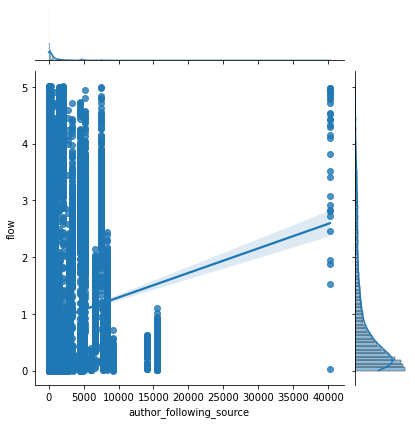

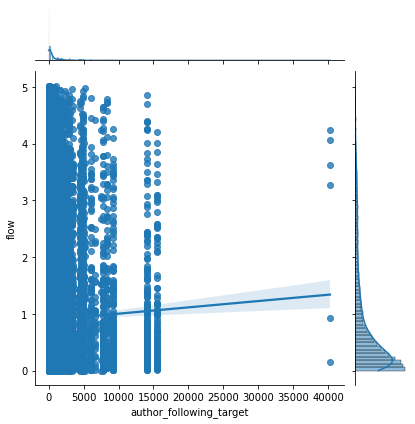

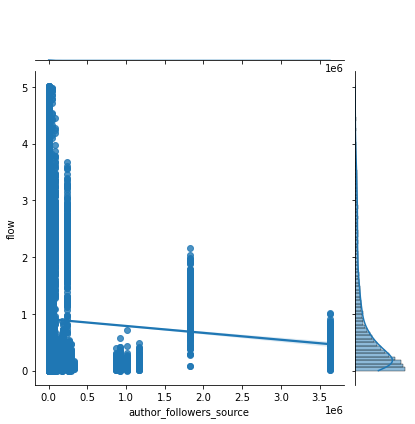

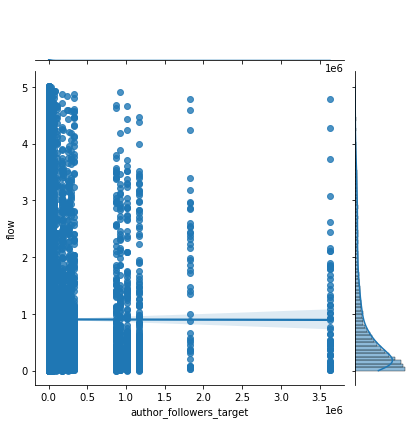

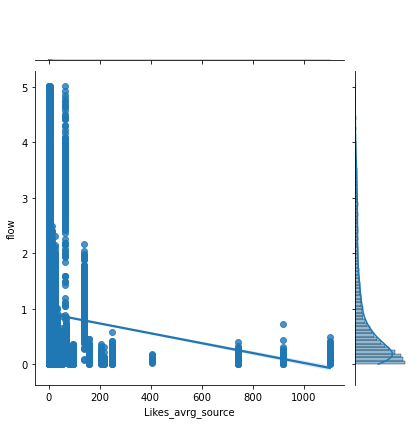

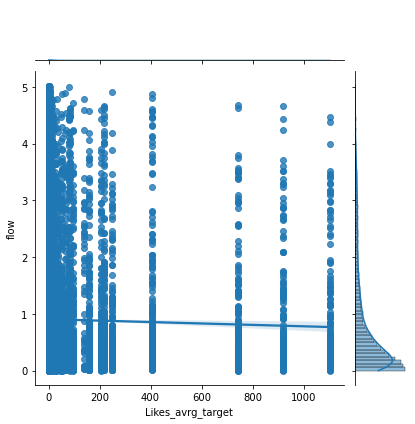

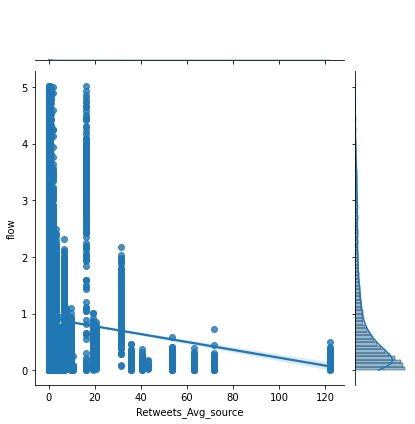

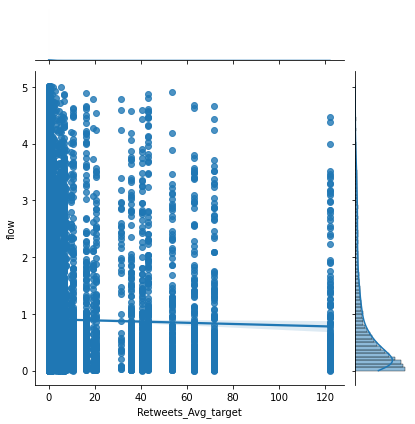

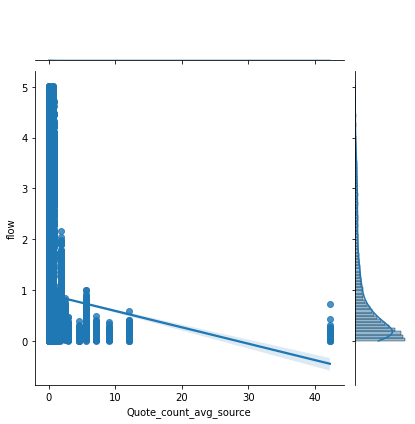

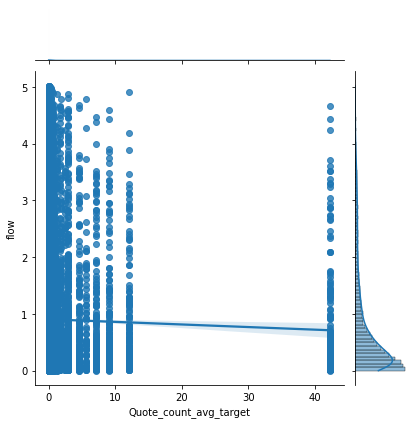

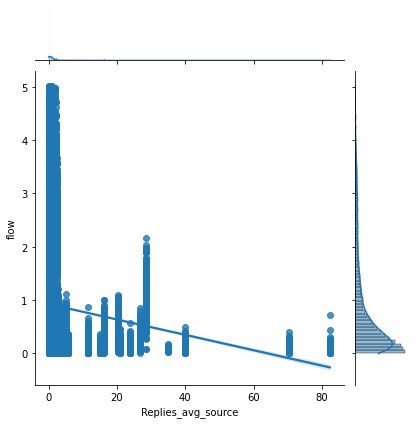

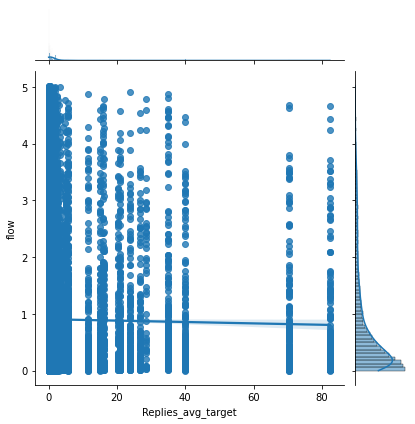

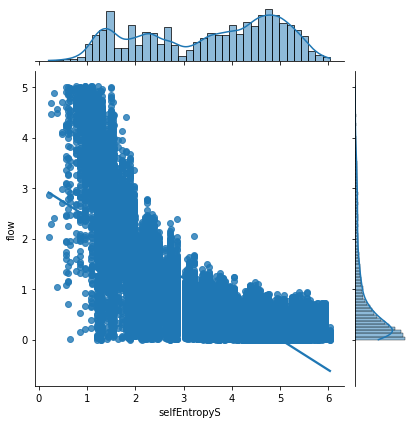

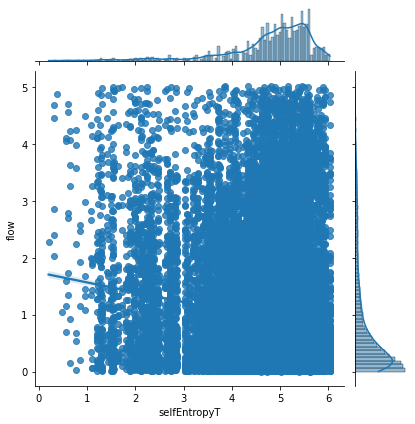

In [2488]:
for i in range(len(visualisation_features_subset)):
    sns.jointplot(data = df, x = visualisation_features_subset[i] , y = 'flow', kind="reg")

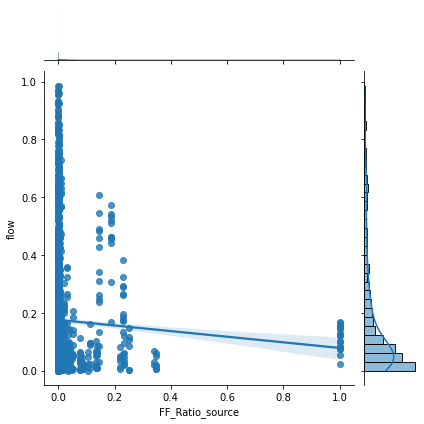

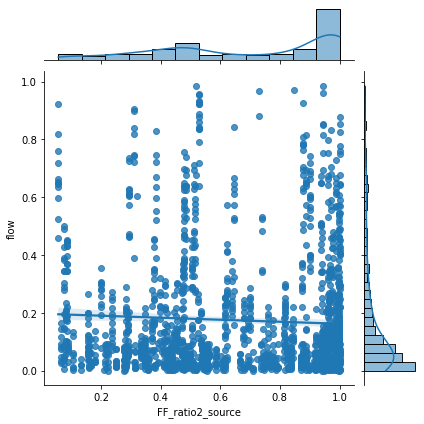

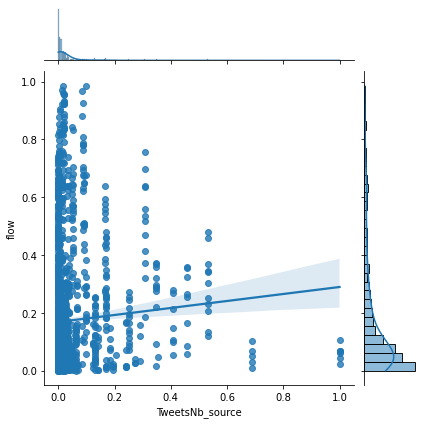

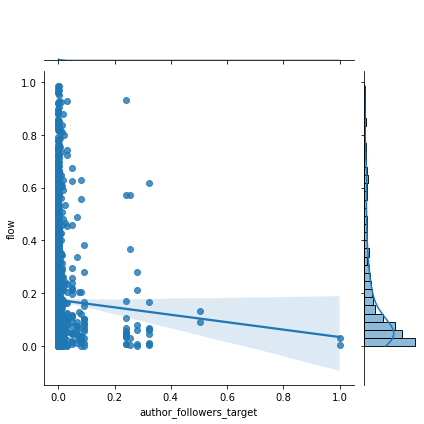

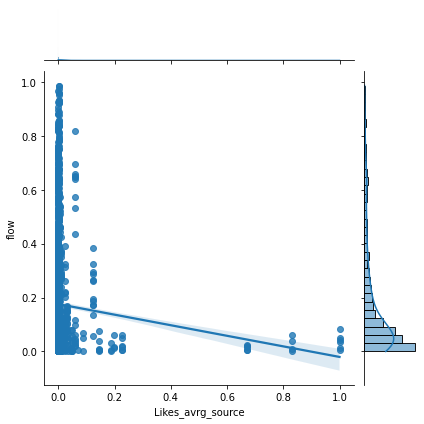

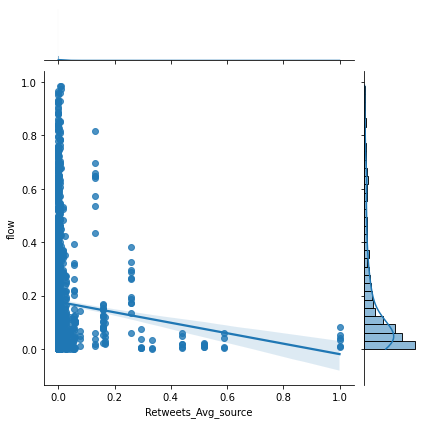

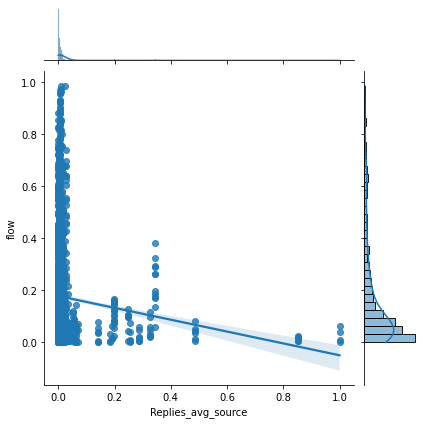

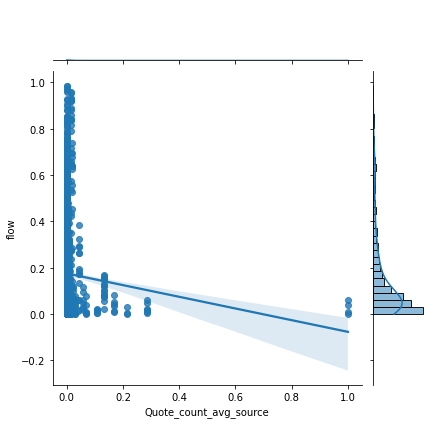

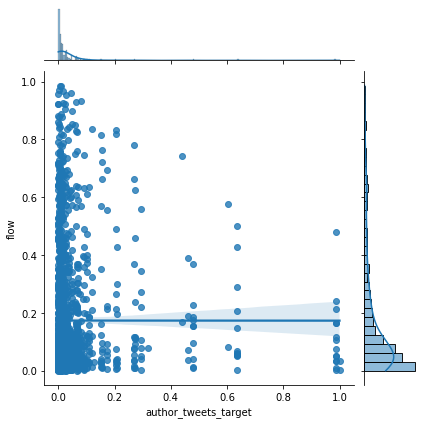

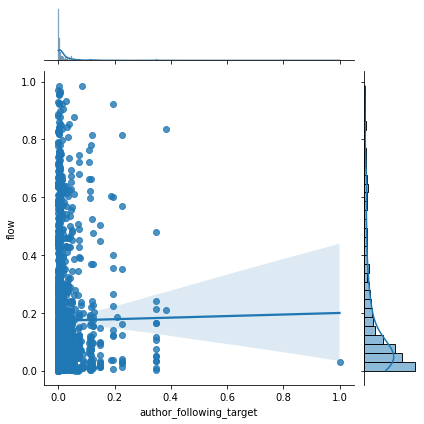

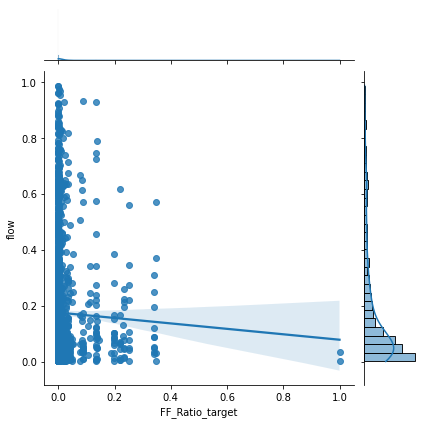

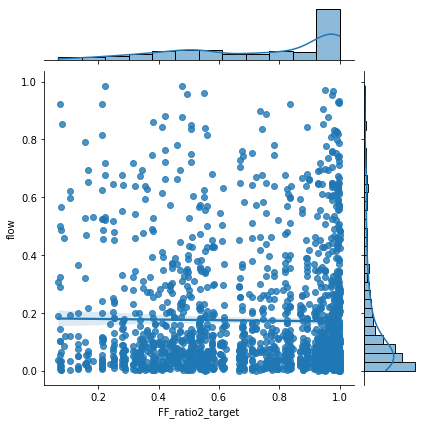

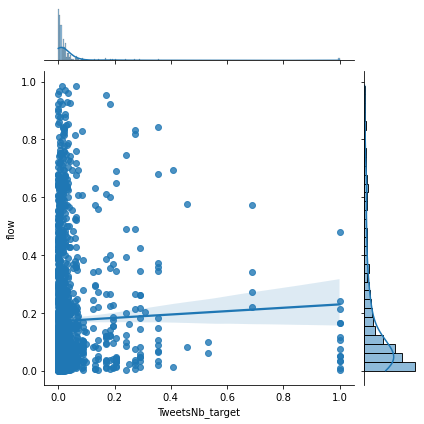

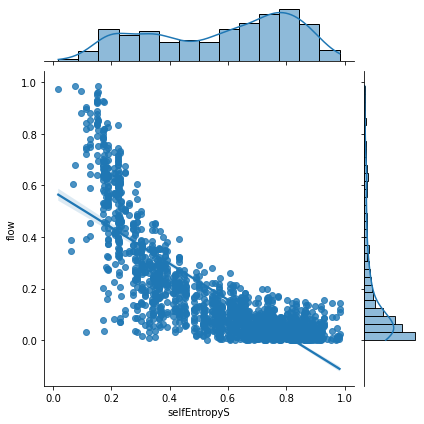

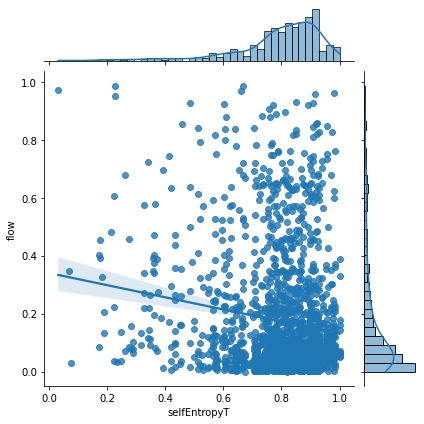

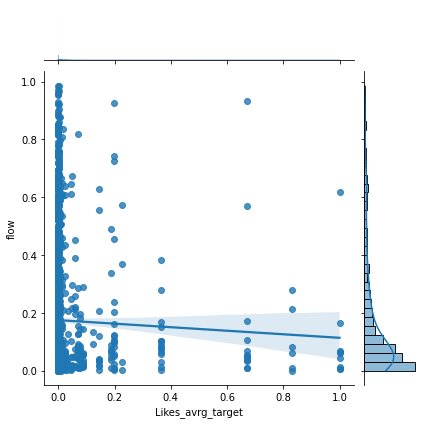

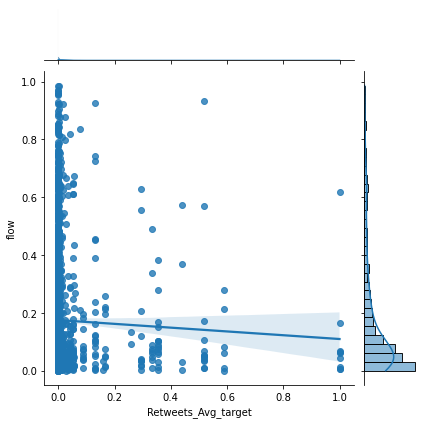

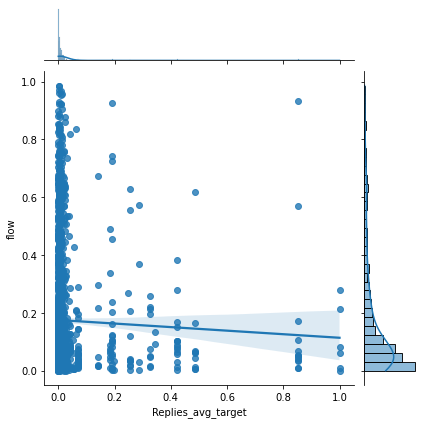

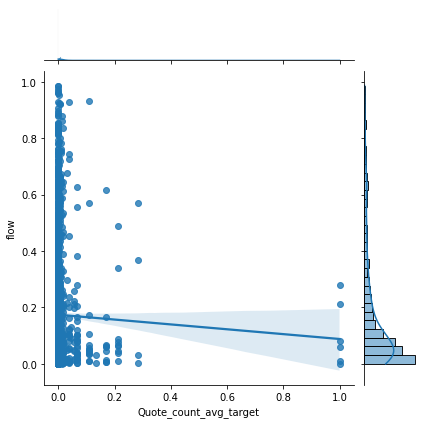

In [2469]:
for i in range(len(visualisation_features_subset)):
    sns.jointplot(data = dfn_sample, x = visualisation_features_subset[i] , y = 'flow', kind="reg")

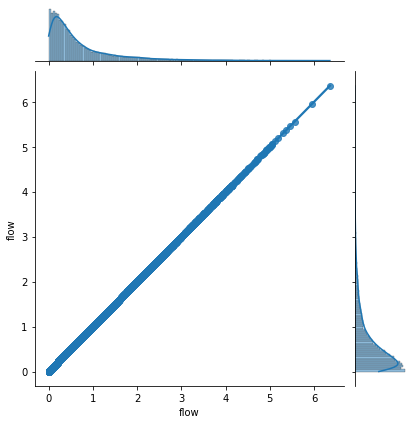

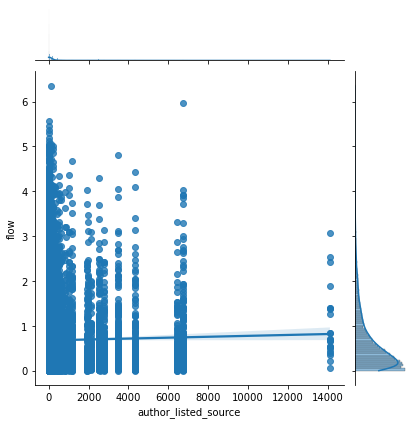

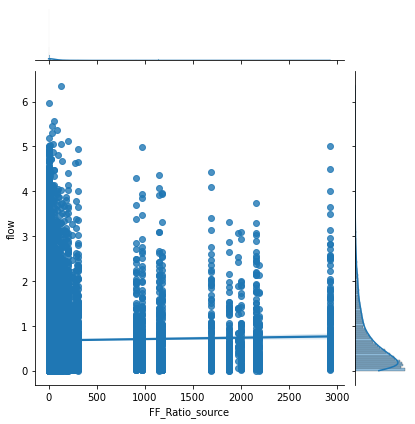

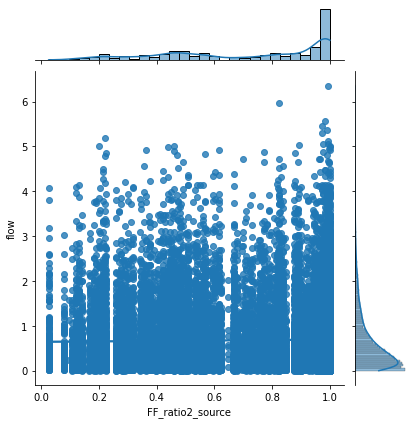

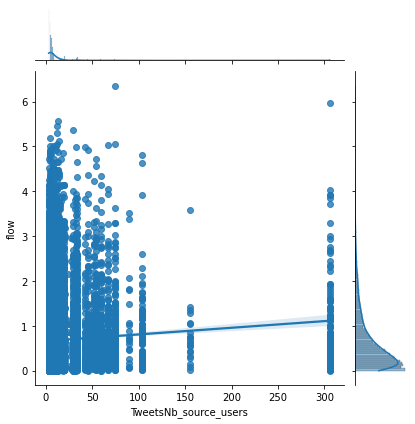

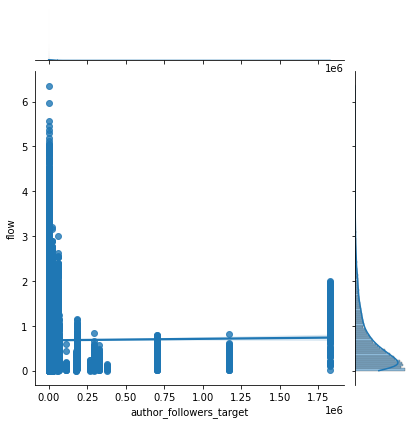

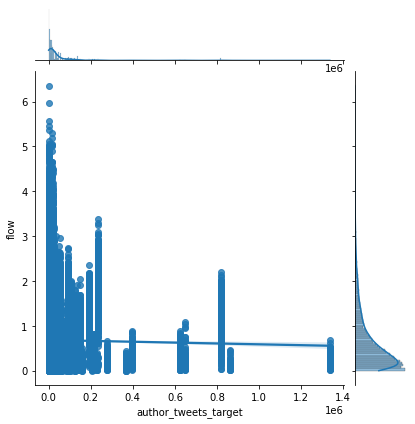

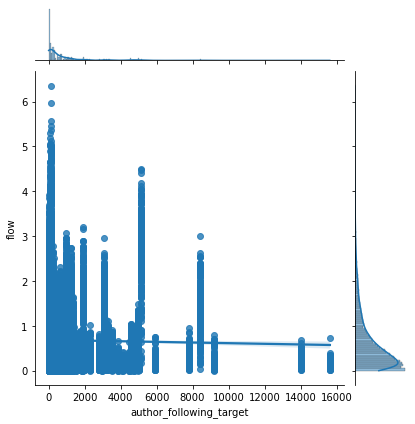

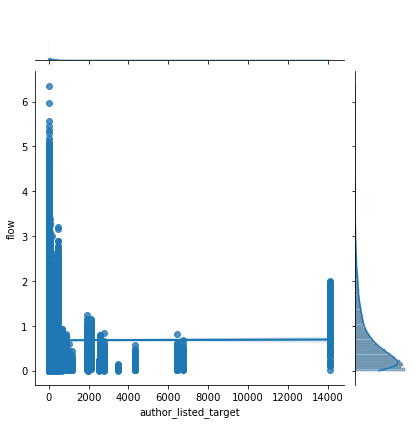

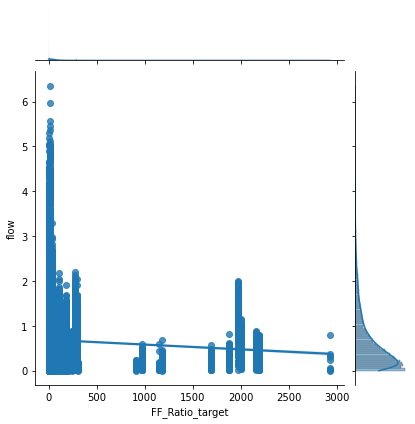

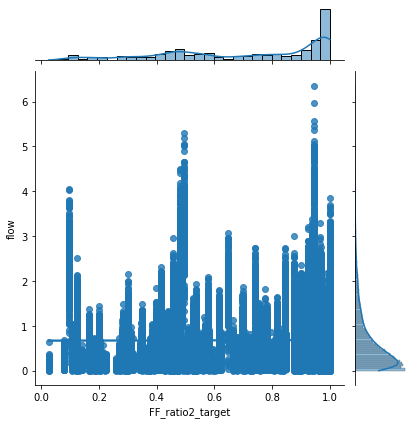

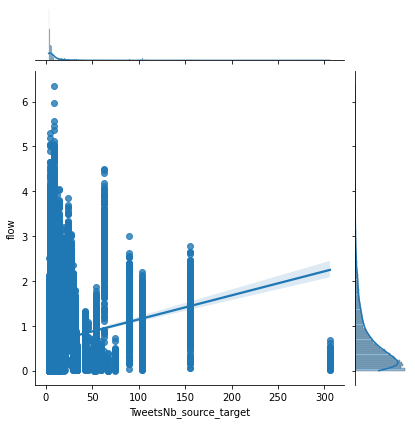

In [1581]:

for i in range(len(columns_rfe)):
    #sns = ax[i%4, math.floor(i/4)]
    sns.jointplot(data = df, x = columns_rfe[i] , y = 'flow', kind="reg")


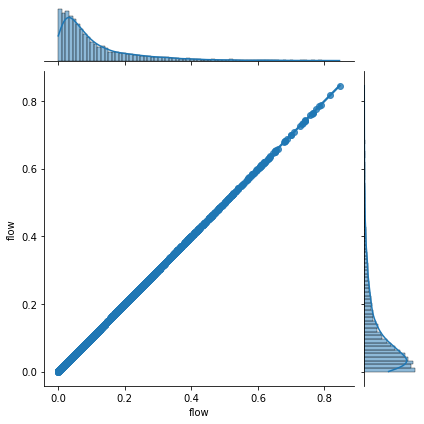

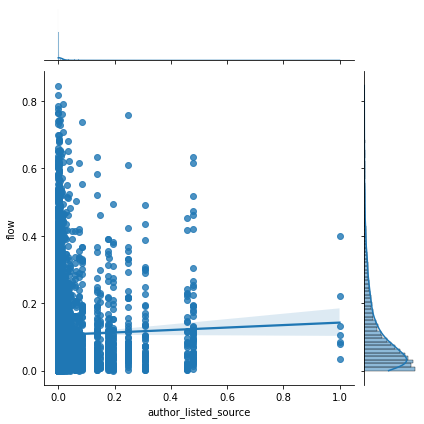

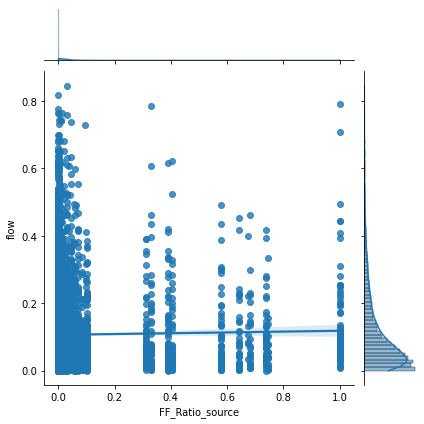

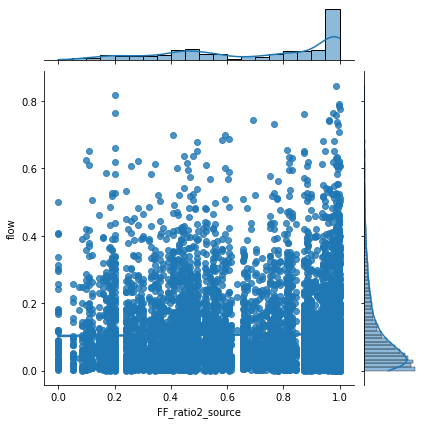

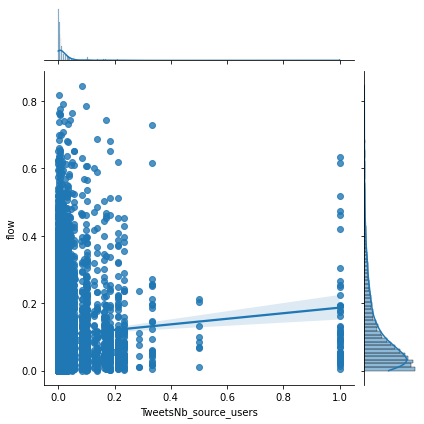

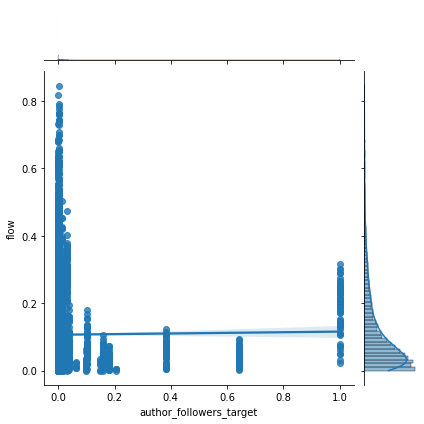

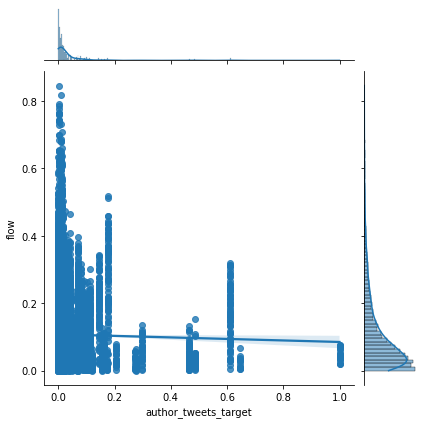

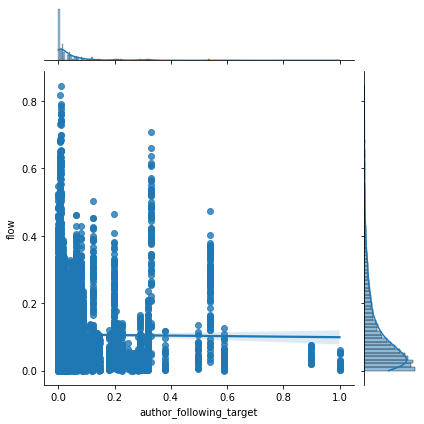

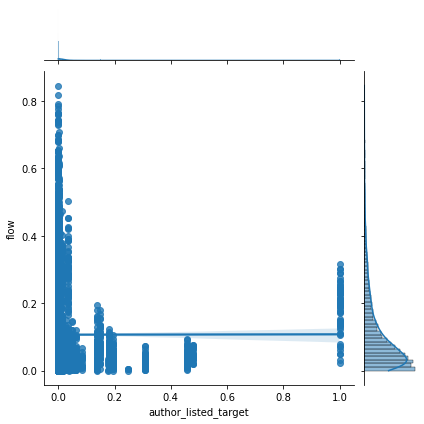

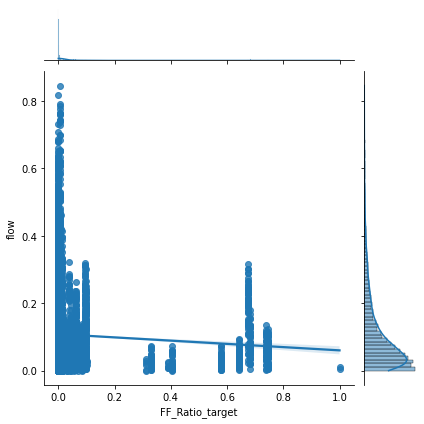

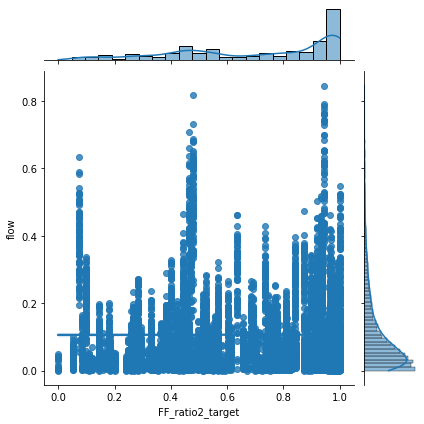

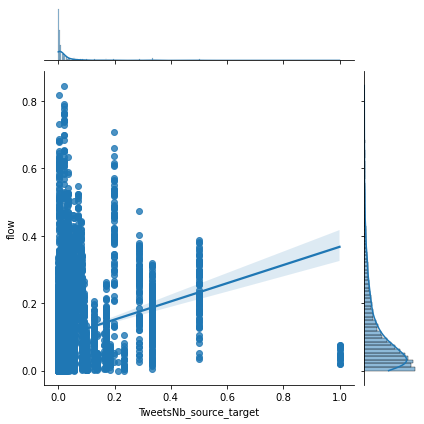

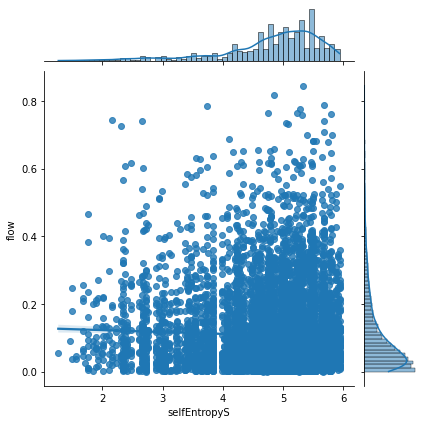

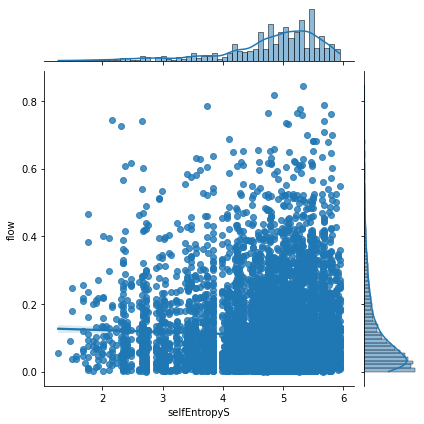

In [1526]:

for i in range(len(columns_rfe)):
    #sns = ax[i%4, math.floor(i/4)]
    #sbplt.hist(df[columns_rfe_2].iloc[i].values, range = [0,200], bins = 20)
    sns.jointplot(data = dfs, x = columns_rfe[i] , y = 'flow', kind="reg")

   # sns.set_title(df.index[i])
    
#fig.tight_layout()

#fig.text(0.4,0, "Movie length in minutes")
#fig.text(0,0.6, "Number of movies", rotation = 90)

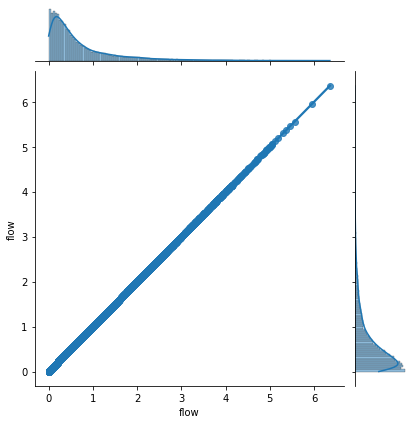

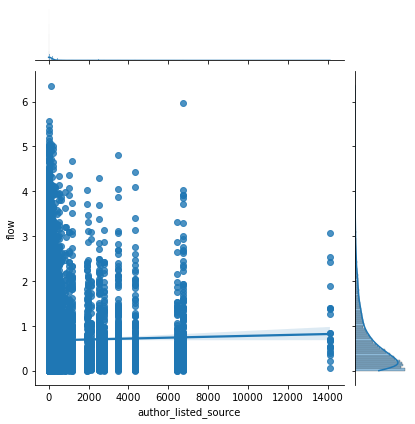

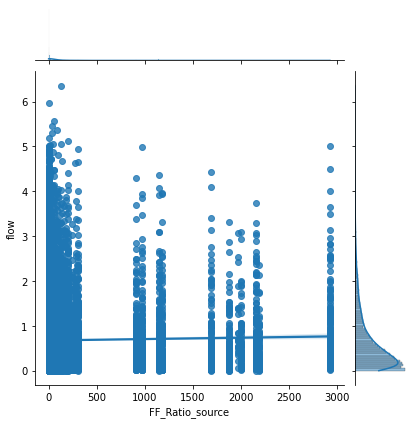

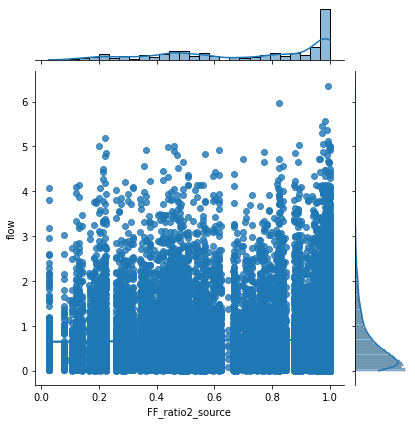

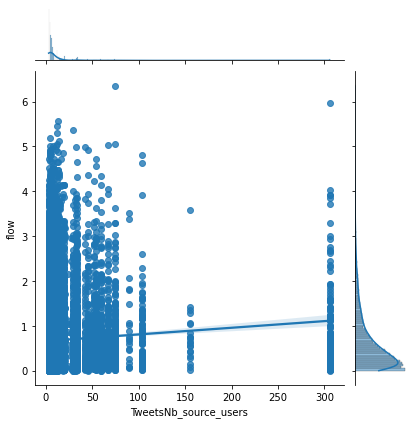

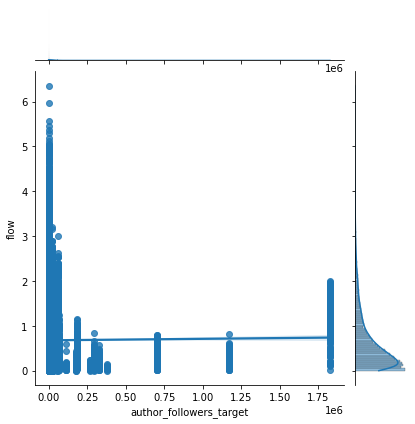

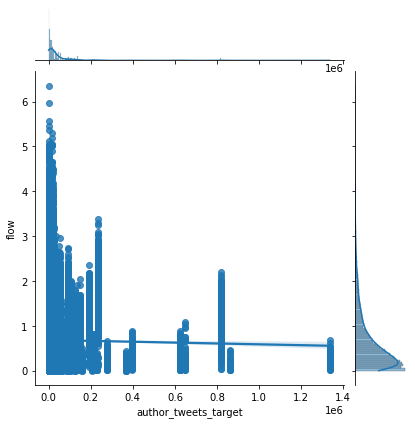

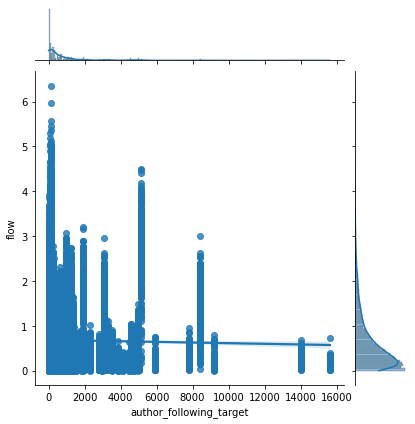

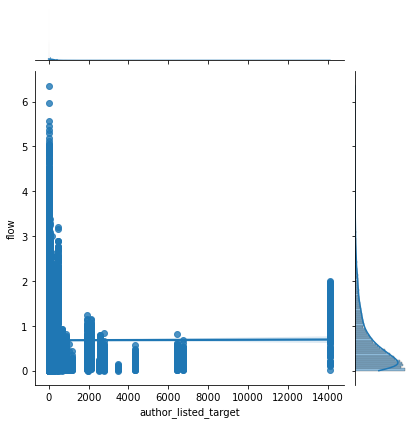

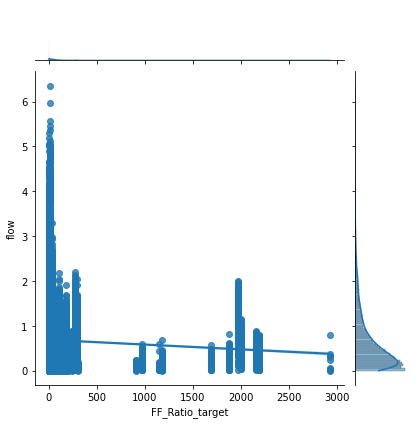

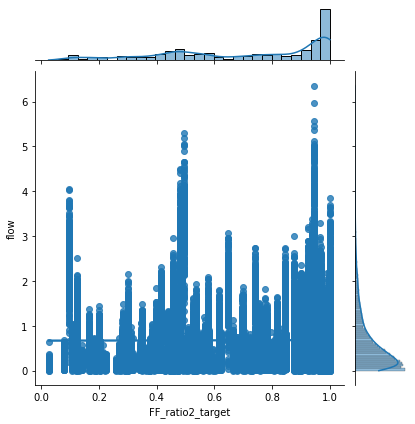

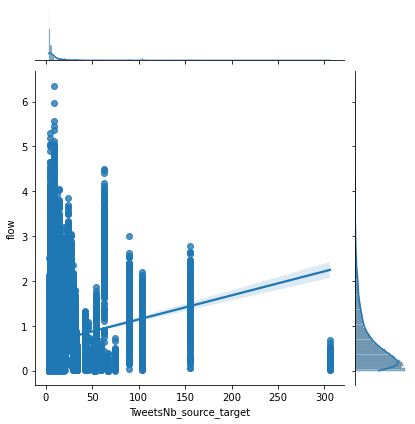

In [1577]:
# Write your code to make 4x4 panel here

#fig, ax = plt.subplots(4,4,figsize= (8,6), sharey = True, sharex = True)

for i in range(len(columns_rfe)):
    #sns = ax[i%4, math.floor(i/4)]
    #sbplt.hist(df[columns_rfe_2].iloc[i].values, range = [0,200], bins = 20)
    sns.jointplot(data = df, x = columns_rfe[i] , y = 'flow', kind="reg")

   # sns.set_title(df.index[i])
    
#fig.tight_layout()

#fig.text(0.4,0, "Movie length in minutes")
#fig.text(0,0.6, "Number of movies", rotation = 90)